In [1]:
 import wandb
 import pandas as pd

 run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
 local_path = wandb.use_artifact("sample.csv:latest").file()
 df = pd.read_csv(local_path)

wandb: Currently logged in as: kangaroo98 (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.9 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [49]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,15877.000000,20000.000000,20000.000000
mean,1.892380e+07,6.746034e+07,40.728455,-73.952125,153.269050,6.992100,23.274100,1.377446,6.955450,112.901200
std,1.101223e+07,7.857936e+07,0.054755,0.046559,243.325609,21.645449,44.927793,1.683006,32.433831,131.762226
min,2.539000e+03,2.571000e+03,40.508730,-74.239140,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.393540e+06,7.853718e+06,40.689420,-73.983030,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.952117e+07,3.111431e+07,40.722730,-73.955640,105.000000,2.000000,5.000000,0.720000,1.000000,44.000000
75%,2.912936e+07,1.068426e+08,40.762990,-73.936380,175.000000,5.000000,23.000000,2.010000,2.000000,229.000000
max,3.648561e+07,2.742733e+08,40.913060,-73.717950,10000.000000,1250.000000,607.000000,27.950000,327.000000,365.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19001 non-null  int64  
 1   name                            18994 non-null  object 
 2   host_id                         19001 non-null  int64  
 3   host_name                       18993 non-null  object 
 4   neighbourhood_group             19001 non-null  object 
 5   neighbourhood                   19001 non-null  object 
 6   latitude                        19001 non-null  float64
 7   longitude                       19001 non-null  float64
 8   room_type                       19001 non-null  object 
 9   price                           19001 non-null  int64  
 10  minimum_nights                  19001 non-null  int64  
 11  number_of_reviews               19001 non-null  int64  
 12  last_review                     

In [25]:
# Drop outliers 
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()

In [4]:
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [12]:
df['neighbourhood_group'].value_counts()

Manhattan        8774
Brooklyn         8265
Queens           2355
Bronx             441
Staten Island     165
Name: neighbourhood_group, dtype: int64

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

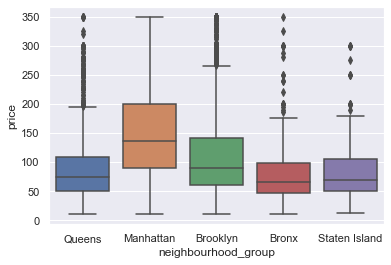

In [26]:
import seaborn as sns
sns.set()
sns.boxplot(x="neighbourhood_group", y="price", data=df)

<AxesSubplot:xlabel='room_type', ylabel='price'>

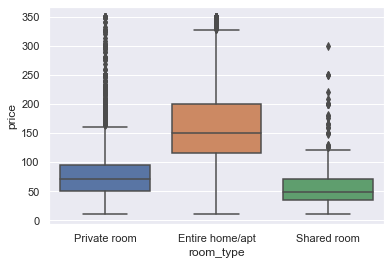

In [27]:
sns.boxplot(x="room_type", y="price", data=df)

In [64]:
df_grp = df[['neighbourhood_group','room_type','price']]
df_grp = df_grp.groupby(['neighbourhood_group','room_type'],as_index=False).mean()
df_grp

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,113.682759
1,Bronx,Private room,63.500000
2,Bronx,Shared room,46.962963
3,Brooklyn,Entire home/apt,151.030900
4,Brooklyn,Private room,70.548792
5,Brooklyn,Shared room,48.940789
6,Manhattan,Entire home/apt,186.170467
7,Manhattan,Private room,99.108613
8,Manhattan,Shared room,76.405556
9,Queens,Entire home/apt,132.074246


In [69]:
df_pivot = df_grp.pivot(index='neighbourhood_group',columns='room_type')
df_pivot

price                         
room_type           Entire home/apt Private room Shared room
neighbourhood_group                                         
Bronx                    113.682759    63.500000   46.962963
Brooklyn                 151.030900    70.548792   48.940789
Manhattan                186.170467    99.108613   76.405556
Queens                   132.074246    65.741750   51.280000
Staten Island            122.544118    61.977011   55.500000

<AxesSubplot:xlabel='None-room_type', ylabel='neighbourhood_group'>

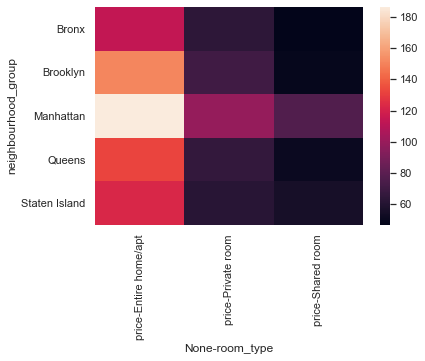

In [71]:
sns.heatmap(df_pivot)

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

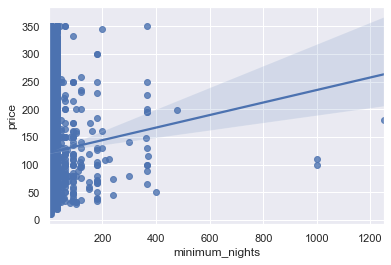

In [81]:
sns.regplot(x="minimum_nights",y="price", data=df)

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

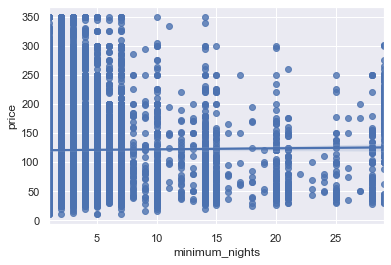

In [87]:
min_nights = 30
idx = df['minimum_nights']<min_nights
df_min_nights = df[idx].copy()
sns.regplot(x="minimum_nights",y="price", data=df_min_nights)

In [88]:
df_grp2 = df_min_nights[['minimum_nights','room_type','price']]
df_grp2 = df_grp2.groupby(['minimum_nights','room_type'],as_index=False).mean()
df_grp2

df_pivot2 = df_grp2.pivot(index='room_type',columns='minimum_nights')
df_pivot2

price                                                  \
minimum_nights           1           2           3           4           5    
room_type                                                                     
Entire home/apt  160.667093  169.512236  167.883616  167.448408  159.746894   
Private room      82.567030   81.248004   84.860917   80.352423   76.956067   
Shared room       68.345133   54.594937   73.827586   66.642857   43.388889   

                                                                             \
minimum_nights           6           7           8           9           10   
room_type                                                                     
Entire home/apt  163.023256  162.166667  141.606061  146.850000  160.725000   
Private room      70.946903   70.460526   71.631579   68.153846   69.282609   
Shared room             NaN   55.200000         NaN   28.000000   48.166667   

                 ...                                                        \
minimum_nights   ...          20          21    22    23    24          25   
room_type        ...                                                         
Entire home/apt  ...  133.021277  122.761905   NaN   NaN  75.0  143.500000   
Private room     ...   60.372549   64.806452  80.0  66.5  64.5   66.526316   
Shared room      ...   26.000000         NaN   NaN   NaN   NaN   30.000000   

                                                                 
minimum_nights           26          27          28          29  
room_type                                                        
Entire home/apt  138.333333  141.666667  151.413793  182.365217  
Private room      55.000000   50.000000   66.970588   38.250000  
Shared room             NaN         NaN         NaN         NaN  

[3 rows x 29 columns]

In [89]:
run.finish()